# Assignment 2: “Text Mining with Simpsons ”
Due: Monday 2pm, December 14, 2020, via Moodle

### Submission guidelines

- Solutions need to be uploaded as a single Jupyter notebook. You will find many provided codes in the notebook, your task is to fill in the missing cells.
- For the written solution use LaTeX in markdown inside the same notebook. Do *not* hand in a seperate file for it.
- Download the .zip file containing the dataset but do *not* upload it with your solution.
- It is sufficient if one person per group uploads the solution to Moodle, but make sure that the names of
all team members are given on the PDF and in the source code.

--------

The Simpson show is the world’s longest-running animated sitcom. The show revolves around the lives of the Simpson family, which consists of Homer, Marge, Bart, Lisa, and the little Maggi.
For this notebook, you should download the dataset that contains the characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989.
In the following exercises, we will explore the data and use visualizations to gain some insight into the show. The Zip file alongside this notebook should contain the following files:

` simpsons_characters.csv, simpsons_locations.csv, simpsons_script_lines.csv, simpsons_episodes.csv`


Take some time and familiarize yourself with the data. `simpsons_characters.csv` contains the character-names and their gender.
`simpsons_locations.csv` contains information about locations in the shows,
and `simpsons_episodes.csv` has information about each episode including their title, rating, and views.
Finally, `simpsons_script_lines.csv` lists all the lines in the show, who said the line and where it was said. Be aware that this data set is not cleaned and, hence, includes faulty data as well as inconsistent data types.

Import the needed packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from os import path
%matplotlib inline

Let's read the data and get started!

### Task 1:  Important Characters (3 + 2 + 2 + 4 = 11 point)
### Sub-Task 1: 
Load the four datasets in the respective variables using pandas (pd),
make sure to set the type of the `character_id` to integer and drop the line that has the non-numeric character ID `142024`.

In [2]:
df_characters = pd.read_csv('data/simpsons_characters.csv')
df_locations = pd.read_csv('data/simpsons_locations.csv')
df_script = pd.read_csv('data/simpsons_script_lines.csv')
df_episodes = pd.read_csv('data/simpsons_episodes.csv')

/home/st/miniconda3/envs/text_analytics/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Using panda's `.head()` function look at the top rows of each dataset.

In [3]:
df_characters.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [4]:
df_locations.head()

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


In [5]:
df_script.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [6]:
df_episodes.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


Let's take a look at the important characters of the show. To start we detect the main characters by the number of spoken words/lines throughout the show. 
Extract top 10 characters based on the number of spoken words (word count) as well as the 10 most prominent characters regarding the number of lines they head during the show.
Compare both results by drawing two bar plots: For the first plot, the x-axis should show the name of the top 10 characters with regard to the word count and the y-axis should display the number of spoken words.
In the second plot, you should do the same but this time considering the number of lines for each character (,i.e., the characters displayed on the x-axis can be different for the first and second bar plot). You might notice that there is a column with `word_count` in the `scripts` data frame, but cleaning it up might be tricky. To find the sum of all values, first remove the `nan` and any other string characters in that colum, you can use the `conv` function provided.

In [7]:
def conv(row):
    try:
        return int(row)
    except:
        return np.nan
df_script["word_count"] = df_script["word_count"].apply(lambda cell: conv(cell))
df_script.dropna(subset=["word_count"], inplace=True)

df_script["character_id"] = df_script["character_id"].apply(lambda cell: conv(cell))
df_script.dropna(subset=["character_id"], inplace=True)

top_characters_words = df_script.groupby("character_id")["word_count"].sum()
top_characters_words.head(20)
merge_data_words_sub = pd.merge(top_characters_words, df_characters, how="inner", left_on="character_id", right_on="id")
merge_data_words_sub = merge_data_words_sub.sort_values(by=['word_count'], ascending=False)
merge_data_words_sub.head(5)

,word_count,id,name,normalized_name,gender
0,1270666.0,1,Marge Simpson,marge simpson,f
238,1154000.0,241,Entire Town,entire town,NaN
1,682780.0,2,Homer Simpson,homer simpson,m
3364,672126.0,3592,Robert Pinsky,robert pinsky,NaN
2605,571000.0,2739,ABBA,abba,NaN


In [8]:
top_characters_sentences = df_script.groupby("character_id").size()
merge_data_sentences_sub = pd.merge(top_characters_sentences.rename('top_characters_sentences'), df_characters, how="inner", left_on="character_id", right_on="id")
merge_data_sentences_sub = merge_data_sentences_sub.sort_values(by=['top_characters_sentences'], ascending=False)
merge_data_sentences_sub.head(10)

,top_characters_sentences,id,name,normalized_name,gender
1,28167,2,Homer Simpson,homer simpson,m
0,13290,1,Marge Simpson,marge simpson,f
7,13201,8,Bart Simpson,bart simpson,m
8,10895,9,Lisa Simpson,lisa simpson,f
14,3121,15,C. Montgomery Burns,c montgomery burns,m
16,2809,17,Moe Szyslak,moe szyslak,m
2,2390,3,Seymour Skinner,seymour skinner,m
10,2057,11,Ned Flanders,ned flanders,m
30,1875,31,Grampa Simpson,grampa simpson,m
24,1798,25,Milhouse Van Houten,milhouse van houten,m


<AxesSubplot:xlabel='name'>

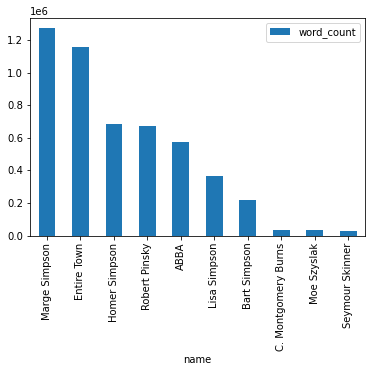

In [9]:
#### Draw the word count plot ####
#### Hint: look at the plot function from dataframe #### 

df_first_n_items_by_words = merge_data_words_sub[["word_count", "name", "id"]].head(10)
#df_first_n_items.head()
df_first_n_items_by_words.plot.bar(x='name', y='word_count')

<AxesSubplot:xlabel='name'>

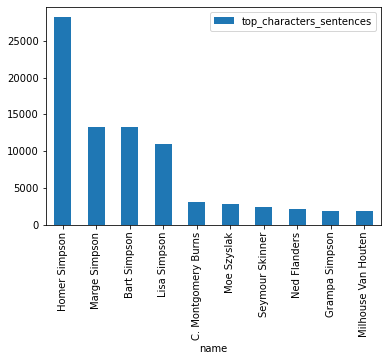

In [10]:
#### Draw the sentence count plot ####
#### Hint: look at the plot function from dataframe #### 

df_first_n_items_by_sentences = merge_data_sentences_sub[["top_characters_sentences", "name", "id"]].head(10)
#df_first_n_items.head()
df_first_n_items_by_sentences.plot.bar(x='name', y='top_characters_sentences')

If you have done the exercise correctly you should see that the top-4 characters of the show (Homer, Marge, Bart, and Lisa Simpson) have the most dialogs (lines) in the show but their distribution differs when we look at the word count.
Seems like some characters speak in long sentences.

### Sub-Task 2: Common Words and Word Cloud 
Let's examine the dialogues and look at the top 20 common words, draw a bar plot in the same way as above to show the frequencies.
To generate a meaningful output use the preprocessing pipelines explained in the lecture: 
- use regex to remove non-alphabetic characters and also remove `'` since the tokenizer will treat it as a new token (anything that is not a number or alphabet including punctuations)
- lowercase all words
- remove stopwords based on spaCy's stopword list
- tokenize the `spoken_words` (remove single characters produced by the tokenizer)
- perform stemming 
 
In this exercise, we require you to use SpaCy for all language processing steps except for stemming.
This is due to the lack of a stemmer in SpaCy's library that only provides a tool for lemmatization.
Hence, for Stemming we are going to use one of the stemmers provided by NLTK.


In [11]:
import spacy 
import re 
from collections import Counter
from matplotlib import pyplot as plt
from nltk.stem import PorterStemmer

In [12]:
nlp = spacy.load("en_core_web_sm") ### load en_core_web_sm and disable the tagger, parser and ner.
nlp.disable_pipes('tagger', 'parser', 'ner')   ### and disable the tagger, parser and ner.
stopwords = spacy.lang.en.stop_words.STOP_WORDS ### load the list of stopwords from spacy for the English language
stemmer = PorterStemmer() ### initialize the stemmer from NLTK

df_script["spoken_words"] = df_script["spoken_words"].str.lower().str.replace('[^a-zA-Z ]', '') ### Your code to lower case and remove non-alphabetic characters
df_script.dropna(subset=["spoken_words"], inplace=True)

script_words_array = []
df_script_words = df_script["spoken_words"].apply(lambda cell: script_words_array.append(cell))

def tokenize(input_string):
    doc = nlp(input_string)
    tokens = []
    for token in doc:
        tokens.append(token.text)
    return tokens

df_script['all_tokens'] = df_script['spoken_words'].apply(lambda cell: tokenize(cell))

def remove_stopwords(input_list_of_tokens):
    return [token for token in input_list_of_tokens if not token in stopwords]

df_script['tokens_without_stopwords'] = df_script['all_tokens'].apply(lambda cell: remove_stopwords(cell))

def remove_single_characters(input_list_of_tokens):
    return [token for token in input_list_of_tokens if not len(token) == 1]

df_script['cleaned_tokens'] = df_script['tokens_without_stopwords'].apply(lambda cell: remove_single_characters(cell))

def perform_stemming(input_list_of_tokens):
    stems = []
    for token in input_list_of_tokens:
        stems.append(stemmer.stem(token))
    return stems

df_script['stems'] = df_script['cleaned_tokens'].apply(lambda cell: perform_stemming(cell))

df_script.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,all_tokens,tokens_without_stopwords,cleaned_tokens,stems
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,no actually it was a little of both sometimes ...,no actually it was a little of both sometimes ...,31.0,"[no, actually, it, was, a, little, of, both, s...","[actually, little, disease, magazines, news, s...","[actually, little, disease, magazines, news, s...","[actual, littl, diseas, magazin, news, show, n..."
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,wheres mr bergstrom,wheres mr bergstrom,3.0,"[where, s, mr, bergstrom]","[s, mr, bergstrom]","[mr, bergstrom]","[mr, bergstrom]"
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,i dont know although id sure like to talk to h...,i dont know although id sure like to talk to h...,22.0,"[i, do, nt, know, although, i, d, sure, like, ...","[nt, know, d, sure, like, talk, nt, touch, les...","[nt, know, sure, like, talk, nt, touch, lesson...","[nt, know, sure, like, talk, nt, touch, lesson..."
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,that life is worth living,that life is worth living,5.0,"[that, life, is, worth, living]","[life, worth, living]","[life, worth, living]","[life, worth, live]"
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,the polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0,"[the, polls, will, be, open, from, now, until,...","[polls, open, end, recess, case, decided, thou...","[polls, open, end, recess, case, decided, thou...","[poll, open, end, recess, case, decid, thought..."


In [13]:
#### Count the words in the scripts and print out the most common 20, remove any single character tokens and stem
counter = Counter(df_script['stems'].explode())
twenty_most_common = counter.most_common(20)
print(twenty_most_common)

[('nt', 15983), ('oh', 8172), ('like', 6269), ('know', 4969), ('ve', 4676), ('got', 4634), ('hey', 4290), ('homer', 4274), ('right', 4108), (nan, 4075), ('look', 3708), ('bart', 3580), ('want', 3571), ('let', 3284), ('think', 3265), ('come', 3190), ('ill', 3188), ('good', 3085), ('yeah', 2988), ('time', 2731)]


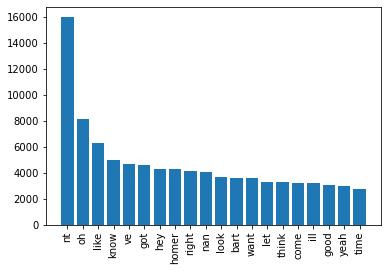

In [14]:
#### draw a bar plot with the x axis as the words and the y axis as the frequencys
x = np.array(twenty_most_common).T[0]
list_of_tuples = list(zip(*twenty_most_common))
list_of_lists = [list(elem) for elem in list_of_tuples]
plt.bar(np.array(list_of_lists[0]), np.array(list_of_lists[1]))
plt.xticks(range(0, x.shape[0]), x, rotation='vertical')
plt.show()

Generate a word cloud to visualize the frequencies:
A word cloud is a graphical representation of frequently used words in the normalized text.
The height of each word in this picture is an indication of the frequency of occurrence of the word in the entire text.
You will need to install the package `wordcloud`.
To achieve a homogeneous output, set the `max_words` to 100 and `max_font_size` to 60.
Make sure the same word does not appear more than once.

In [15]:
from wordcloud import WordCloud

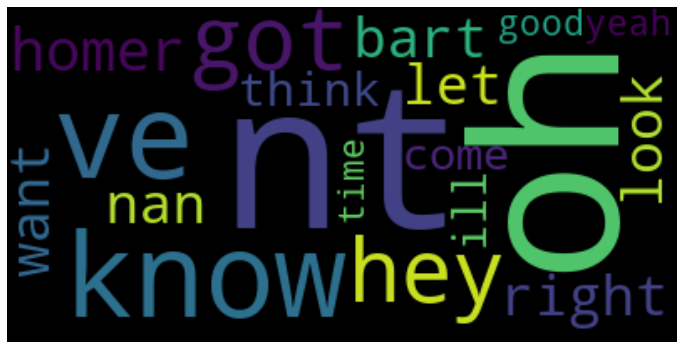

In [16]:
twenty_most_common_words_as_string=(" ").join(x)

wordcloud = WordCloud().generate(twenty_most_common_words_as_string)

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

### Sub-Task 3: Common Named Entities 
Apply named entity recognition using SpaCy and generate a word cloud of the top 50
named entities that have the type `PERSON`, using the same approach
for visualization as above. Take into account that you cannot simply use the
output of the previous step and need to undo the stemming. Since the named entity
recognition takes quite some time, use only the first `10000` scripts.

lisa simpson bart homer simpson burns michael jackson bart simpson homie maggie lisa simpson skinner krusty lurleen krabappel martin bob steve marge marge haw haw jack marge bart bart mm barney kent brockman lanley patty michael god marge simpson eenie meenie minee moe xray specs homer j simpson otto tom jones bergstrom bartender hibbert moon mike rotch nick hey simpson lenny bart lisa ariel kool moe dee barney you mike scioscia ken griffey jr scioscia


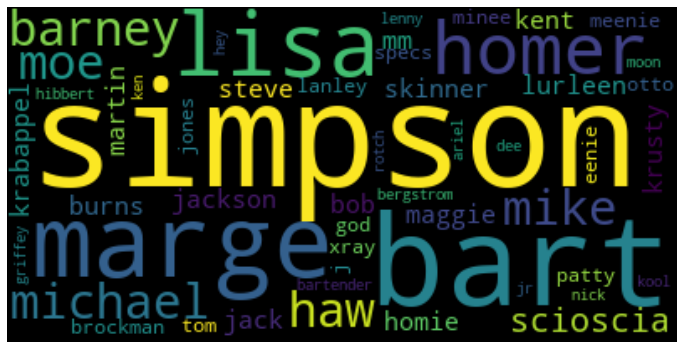

In [17]:
nlp = spacy.load("en_core_web_sm") # Load the small English spacy model again, this time with all components enabled

named_entities = []
for script in df_script.spoken_words.tolist()[:10000]:
    doc = nlp(script)
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            named_entities.append(entity.text)
        #print(entity.text, '-->', entity.label_)

counter = Counter(named_entities)
fifty_most_common_person_entities = counter.most_common(50)
fifty_most_common_person_entities_as_string=(" ").join(np.array(fifty_most_common_person_entities).T[0])
print(fifty_most_common_person_entities_as_string)

wordcloud = WordCloud().generate(fifty_most_common_person_entities_as_string)

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

How well does the named entity recognition work? Do you notice some strange "people" in there?

### Sub Task 4 : Sophistication of Speech
 

Take into account the top 10 characters from the first subtask (based on line count), it is interesting to see whether there are big differences in the sophistication of speech or vocabulary size between the characters.
To measure this, we turn to the Flesch Reading Ease. Although designed for written text we use it here on spoken words.
This measures indicates how difficult a passage in English is to understand and is based on a ranking scale of 0-100, where higher scores indicate material that is easier to read; lower numbers mark passages that are more difficult to read.
For more information look at the [wiki page](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests).

$206.835 - 1.015 \times \frac{total words}{total sentences} - 84.6 \times \frac{total syllables}{total words}$

For syllable counts, download `cmudict` from the NLTK library and count the vowel sounds from the Carnegie Mellon Pronouncing Dictionary (cmudict).
Then count vowel sounds in each word, if a word is not in the dictionary do not count it in.
CMUdict marks each vowel with a stress tag, 0 (unstressed), 1 (stressed), or 2 (secondary stress).

In [18]:
def character_id_to_int():
    df_script["character_id"] = df_script["character_id"].apply(lambda cell: conv(cell))
    df_script.dropna(subset=["character_id"], inplace=True)
character_id_to_int()

def keep_rows_by_character_id(character_ids):
    return df_script.loc[df_script['character_id'].isin(character_ids)]
df_script_top_ten = keep_rows_by_character_id(df_first_n_items_by_sentences["id"].head(10))

def keep_needed_columns(df, list_of_needed_columns):
    return df[list_of_needed_columns]

df_script_top_ten_final = keep_needed_columns(df_script_top_ten, ["character_id", "cleaned_tokens", "word_count", "raw_text"])
print(df_script.shape)
print(df_script_top_ten_final.shape)
df_script_top_ten_final.head()

(132095, 17)
(79603, 4)


,character_id,cleaned_tokens,word_count,raw_text
1,9,"[mr, bergstrom]",3.0,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?
3,9,"[life, worth, living]",5.0,Lisa Simpson: That life is worth living.
7,8,"[victory, party, slide]",5.0,Bart Simpson: Victory party under the slide!
9,9,"[mr, bergstrom, mr, bergstrom]",4.0,Lisa Simpson: (CALLING) Mr. Bergstrom! Mr. Ber...
11,9,"[know, find]",8.0,Lisa Simpson: Do you know where I could find him?


In [19]:
import nltk
nltk.download('cmudict')
from nltk.corpus import cmudict
phoneme_dict = dict(cmudict.entries())
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner"]) # load the same spacy model again, with tagger, parser and ner disabled.
nlp.add_pipe(nlp.create_pipe('sentencizer'))

def syllable_counter(word):
    count = 0
    phones = cmudict.dict().get(word)
    if phones:
        phones0 = phones[0]
        count = len([p for p in phones0 if p[-1].isdigit()])
    #else:
    #    print("Word not found in cmudict")
    return count

def total_sylls(tokens): 
    ### function to use with apply method, to count the total number of syllable in line of a script 
    syllables = []
    for token in tokens:
        syllables.append(syllable_counter(token))
    return sum(syllables)
    
def sentence_count(raw_text):
    ### function to use with apply method, to count the total number of sentences in line of a script 
    doc = nlp(raw_text)
    return len(list(doc.sents))

# TODO: remove [:2] and improve performance
df_script_top_ten['syllable_count'] = df_script_top_ten["cleaned_tokens"][:50].apply(lambda cell: total_sylls(cell))
df_script_top_ten['sentence_count'] = df_script_top_ten["raw_text"][:50].apply(lambda cell: sentence_count(cell))
#df_script_top_ten.head()
top_characters_counts = df_script_top_ten.groupby('character_id').agg('sum') ## use aggragations to find the word_count, syllable_count and sentence_count per person 
top_characters_counts = top_characters_counts[["word_count", "syllable_count", "sentence_count"]]
top_characters_counts.head(10)

[nltk_data] Downloading package cmudict to /home/st/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/home/st/miniconda3/envs/text_analytics/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/st/miniconda3/envs/text_analytics/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,word_count,syllable_count,sentence_count
character_id,,,
1,1270666.0,34.0,6.0
2,682780.0,70.0,32.0
3,28138.0,0.0,0.0
8,218814.0,45.0,24.0
9,364576.0,123.0,56.0
11,22909.0,0.0,0.0
15,36623.0,0.0,0.0
17,32855.0,0.0,0.0
25,14985.0,4.0,5.0


/home/st/miniconda3/envs/text_analytics/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='name'>

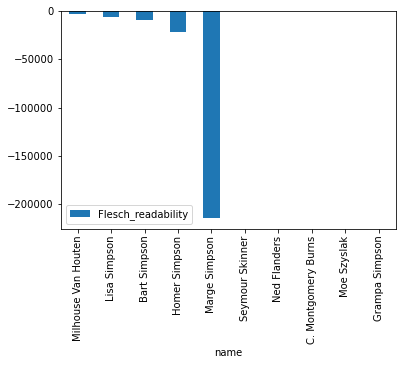

In [20]:
def calculate_flesch_readability(df_row):    
    try:
        flesch_readability = 206.835 - 1.015 * (df_row.word_count/df_row.sentence_count) - 84.6 * (df_row.syllable_count/df_row.word_count)
        return flesch_readability
    except:
        # TODO: kann weg wenn oben für alles berechnet wird und keine 0 mehr auftaucht
        return 0

top_characters_counts['Flesch_readability'] = top_characters_counts.apply(calculate_flesch_readability, axis=1)
#top_characters_counts.head()
merge_characters_flesch = pd.merge(top_characters_counts, df_characters, how="inner", left_on="character_id", right_on="id") ### merge with df_characters to find the character nanmes
merge_characters_flesch_sorted = merge_characters_flesch.sort_values(by=['Flesch_readability'], ascending=False)
merge_characters_flesch_sorted.head()

### draw plot 
df_flesch_readability = merge_characters_flesch_sorted[["Flesch_readability", "name", "id"]].head(10)
#df_first_n_items.head()
df_flesch_readability.plot.bar(x='name', y='Flesch_readability')

## Task 2: TF-IDF ( 3 + 4 = 7 points)


## Sub Task 1: 
Despite all the preprocessing, so far the top words we looked at are not so informative.
We wish to find out the important words that are spoken by the top characters.
For example, the youngest of the family should have "mom" as an important word.
We looked at the Term Frequency - Inverse Document Frequency (TF-IDF) weighting in the lecture, so let's use that here to detect the most important words per character.
In this case, each script line is a document for a certain character who spoke the words.
Use `CountVectorizer` and `TfidfTransformers` from scikit-learn, and use the scikit-learn stop word list to remove stop words and remove the words with a frequency less than 5 from the analysis.
Then plot the TF-IDF values for the top 10 words for Homer, Marge, Bart, and Lisa Simpson as a bar plot.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#del df_script['id']
#df_script = df_script.rename(columns = {'character_id':'id'})  # to merge easily
df_script.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,all_tokens,tokens_without_stopwords,cleaned_tokens,stems
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,no actually it was a little of both sometimes ...,no actually it was a little of both sometimes ...,31.0,"[no, actually, it, was, a, little, of, both, s...","[actually, little, disease, magazines, news, s...","[actually, little, disease, magazines, news, s...","[actual, littl, diseas, magazin, news, show, n..."
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,wheres mr bergstrom,wheres mr bergstrom,3.0,"[where, s, mr, bergstrom]","[s, mr, bergstrom]","[mr, bergstrom]","[mr, bergstrom]"
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,i dont know although id sure like to talk to h...,i dont know although id sure like to talk to h...,22.0,"[i, do, nt, know, although, i, d, sure, like, ...","[nt, know, d, sure, like, talk, nt, touch, les...","[nt, know, sure, like, talk, nt, touch, lesson...","[nt, know, sure, like, talk, nt, touch, lesson..."
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,that life is worth living,that life is worth living,5.0,"[that, life, is, worth, living]","[life, worth, living]","[life, worth, living]","[life, worth, live]"
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,the polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0,"[the, polls, will, be, open, from, now, until,...","[polls, open, end, recess, case, decided, thou...","[polls, open, end, recess, case, decided, thou...","[poll, open, end, recess, case, decid, thought..."


In [22]:
merged_data = pd.merge(df_script, df_characters, how="inner", left_on="character_id", right_on="id") #merge the dataframes to the characters to get the names and drop nan values
merged_data.dropna(subset=["normalized_text"], inplace=True)
#merged_data[merged_data['stems'] == np.nan].head()
merged_data.head()

,id_x,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,...,normalized_text,word_count,all_tokens,tokens_without_stopwords,cleaned_tokens,stems,id_y,name,normalized_name,gender
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,...,no actually it was a little of both sometimes ...,31.0,"[no, actually, it, was, a, little, of, both, s...","[actually, little, disease, magazines, news, s...","[actually, little, disease, magazines, news, s...","[actual, littl, diseas, magazin, news, show, n...",464,Miss Hoover,miss hoover,f
1,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,...,i dont know although id sure like to talk to h...,22.0,"[i, do, nt, know, although, i, d, sure, like, ...","[nt, know, d, sure, like, talk, nt, touch, les...","[nt, know, sure, like, talk, nt, touch, lesson...","[nt, know, sure, like, talk, nt, touch, lesson...",464,Miss Hoover,miss hoover,f
2,14828,49,215,"Miss Hoover: Thank you, Ralph. Very graphic. L...",784000,True,464,3.0,Miss Hoover,Springfield Elementary School,...,thank you ralph very graphic lisa simpson woul...,14.0,"[thank, you, ralph, very, graphic, lisa, simps...","[thank, ralph, graphic, lisa, simpson, like, r...","[thank, ralph, graphic, lisa, simpson, like, r...","[thank, ralph, graphic, lisa, simpson, like, r...",464,Miss Hoover,miss hoover,f
3,14830,49,217,Miss Hoover: Dear God!,803000,True,464,3.0,Miss Hoover,Springfield Elementary School,...,dear god,2.0,"[dear, god]","[dear, god]","[dear, god]","[dear, god]",464,Miss Hoover,miss hoover,f
4,15284,51,35,Miss Hoover: I question the educational value ...,226000,True,464,3.0,Miss Hoover,Springfield Elementary School,...,i question the educational value of this assembly,8.0,"[i, question, the, educational, value, of, thi...","[question, educational, value, assembly]","[question, educational, value, assembly]","[question, educ, valu, assembl]",464,Miss Hoover,miss hoover,f



Top ten words for Homer Simpson:
oh       729.177072
im       587.267208
marge    573.057926
dont     450.361621
just     398.935549
right    382.385406
hey      358.030410
like     353.401870
know     342.871581
thats    342.489921
dtype: float64


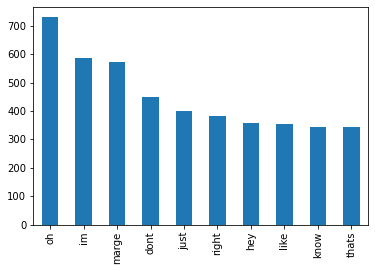


Top ten words for Marge Simpson:
homer    556.411413
oh       383.646986
dont     301.928650
im       277.825359
just     249.297451
bart     237.828007
homie    233.254671
thats    199.955645
know     193.208900
youre    193.191299
dtype: float64


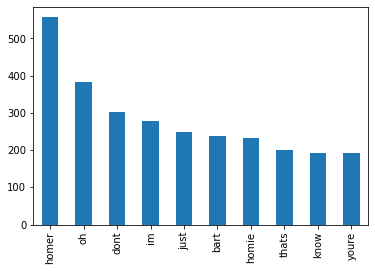


Top ten words for Bart Simpson:
dad      354.264478
oh       277.567764
im       270.190672
hey      268.861644
dont     223.455797
just     199.098999
yeah     188.352156
mom      185.100227
youre    182.558155
like     162.581868
dtype: float64


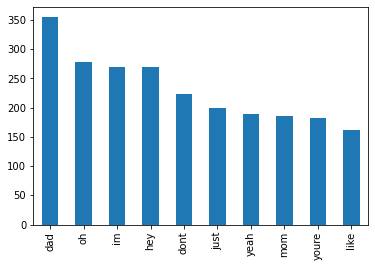


Top ten words for Lisa Simpson:
dad      409.864527
bart     267.645585
mom      237.786320
im       226.695391
oh       213.656165
dont     208.955109
just     189.126203
thats    158.462755
youre    155.892905
like     152.736103
dtype: float64


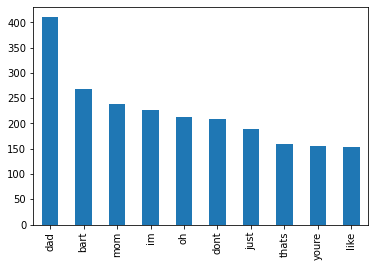

In [56]:
def calc_tf(vectorizer, list_of_docs):
    return vectorizer.fit_transform(list_of_docs)

def calc_idf_and_tfidf(vectorizer, count_vectorized):
    transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
    X = transformer.fit_transform(count_vectorized)
    df_idf = pd.DataFrame({'feature_name':vectorizer.get_feature_names(), 'idf_weights':transformer.idf_})
    
    df_tf_idf = pd.DataFrame(X.toarray() ,columns=vectorizer.get_feature_names())
    return df_tf_idf

def sum_tfidf_over_all_docs(df_tf_idf, number_top_n_words):
    df_tf_idf_sum_over_all_docs = df_tf_idf.sum()
    df_tf_idf_sum_over_all_docs_top_n = df_tf_idf_sum_over_all_docs.sort_values(ascending = False).iloc[:number_top_n_words]
    
    print("\nTop ten words for {}:".format(character_id[1]))
    print(df_tf_idf_sum_over_all_docs_top_n)
    df_tf_idf_sum_over_all_docs_top_n.plot.bar()
    plt.show()

def calc_tfidf(list_of_docs, number_top_n_words, count_vectorizer_max_features=None):
    vectorizer = CountVectorizer(stop_words='english', min_df=5, max_features=count_vectorizer_max_features)
    
    count_vectorized = calc_tf(vectorizer, list_of_docs)
    df_tf = pd.DataFrame(count_vectorized.toarray(), columns=vectorizer.get_feature_names())
    
    df_tf_idf = calc_idf_and_tfidf(vectorizer, count_vectorized)
    
    sum_tfidf_over_all_docs(df_tf_idf, number_top_n_words)

def get_character_items(input_df, character_id):
    corpus = input_df[input_df['character_id'] == character_id]
    return corpus["normalized_text"]

for character_id in [[2, 'Homer Simpson'], [1, 'Marge Simpson'], [8, 'Bart Simpson'], [9, 'Lisa Simpson']]:
    ##### Your code ######
    corpus_list = get_character_items(merged_data, character_id[0])
    
    calc_tfidf(corpus_list, 10)
    
    ### Don't forget that you need the tfidf values for a single word averaged across documents ####

If you did the exercise correctly, "mom" and "dad" should be among the top words for the childern and "homer" should be the top word for Marge, since this is what she calls her husband.

## Sub Task 2: 
If we consider the spoken words from each character a document of its own, we can generate 4 documents (by concatenation of all dialogs) for Homer, Marge, Bart, and Lisa Simpson, and create document vectors from those.
Let's take a look at how the values in these vectors are distributed. Use  `sns.heatmap` from the seaborn package to show the vectors of the 4 documents for the top-20 words (set the `max_features` parameter of the `CountVectorizer` to 20).
Compare it with the heatmap of only term frequencies of the documents. Use `fmt='g'` to print out the correct format.

In [61]:
import seaborn as sns

In [87]:
# prepare data -> 4 docs 

list_of_docs = []
for character_id in [[2, 'Homer Simpson'], [1, 'Marge Simpson'], [8, 'Bart Simpson'], [9, 'Lisa Simpson']]:
    ##### Your code ######
    corpus_list = get_character_items(merged_data, character_id[0])
    list_of_docs.append(' '.join(corpus_list))

character_list = ['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson']
vectorizer = CountVectorizer(stop_words='english', max_features=20)
count_vectorized = calc_tf(vectorizer, list_of_docs)
df_tf = pd.DataFrame(count_vectorized.toarray(), columns=vectorizer.get_feature_names())
#df_tf.index = character_list
df_tf_idf = calc_idf_and_tfidf(vectorizer, count_vectorized)
#df_tf_idf.index = character_list
df_tf_idf.head()

,bart,dad,dont,gonna,got,hey,homer,ill,im,just,know,like,look,marge,oh,okay,right,thats,think,youre
0,0.097552,0.039389,0.288974,0.136204,0.143935,0.178906,0.055770,0.169887,0.424810,0.271857,0.202834,0.239462,0.120743,0.336646,0.427571,0.140254,0.190686,0.179274,0.112461,0.194367
1,0.211040,0.010462,0.346323,0.054834,0.110390,0.023088,0.490263,0.088745,0.349930,0.288602,0.208515,0.220059,0.100289,0.029221,0.373019,0.084055,0.131314,0.181098,0.153681,0.207433
2,0.064614,0.410888,0.296677,0.156529,0.183375,0.314878,0.084635,0.146973,0.396782,0.282116,0.197026,0.229788,0.127862,0.002275,0.292582,0.108751,0.159259,0.146518,0.114666,0.224783
3,0.349302,0.521332,0.286399,0.104838,0.115322,0.107221,0.012867,0.098643,0.342630,0.284016,0.189662,0.214442,0.120564,0.001430,0.254947,0.093401,0.107697,0.181084,0.154398,0.204911


<AxesSubplot:>

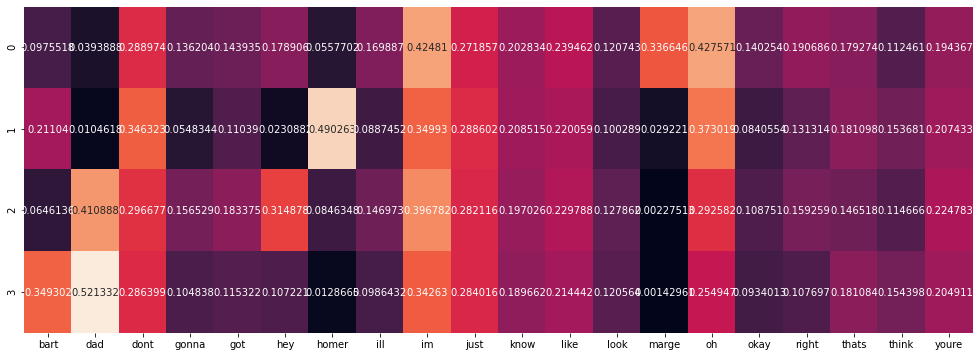

In [88]:
fig, ax = plt.subplots(figsize=(17,6))         
sns.heatmap(df_tf_idf ### Your tfidf weights ###
    , annot=True, cbar=False, ax=ax, xticklabels=df_tf_idf.columns, fmt='g' # top 20 words
)

<AxesSubplot:>

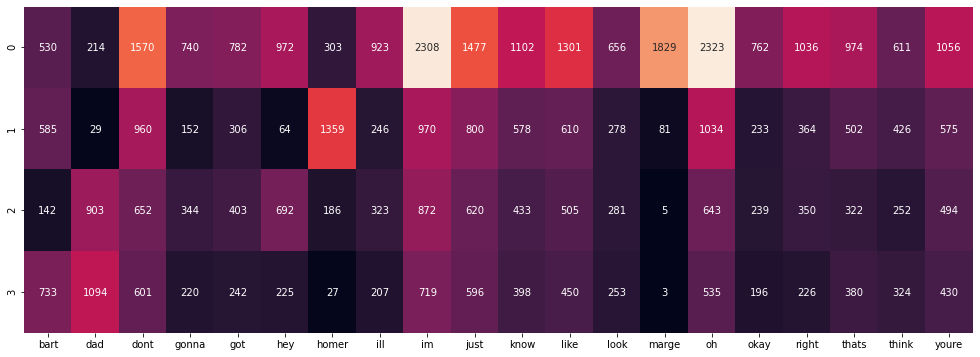

In [89]:
fig, ax = plt.subplots(figsize=(17,6))         
sns.heatmap(df_tf ### Your count vectorizer weights ###
    , annot=True, cbar=False, ax=ax, xticklabels=df_tf.columns, fmt='g' #top 20 words
)

Based on the TF_IDF vectors of the top-20 words, which characters are similar?

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
names = ['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson']
#cosine= ### Your code ### 
for i,name in zip(range(4),names):
    for j,name2 in zip(range(i+1,4),names[i+1:]):
        print('{} to {}: {}'.format(name, name2, cosine_similarity(df_tf_idf.iloc[[i]], df_tf_idf.iloc[[j]])))


Homer Simpson to Marge Simpson: [[0.82142195]]
Homer Simpson to Bart Simpson: [[0.85197557]]
Homer Simpson to Lisa Simpson: [[0.76483166]]
Marge Simpson to Bart Simpson: [[0.76609426]]
Marge Simpson to Lisa Simpson: [[0.73122939]]
Bart Simpson to Lisa Simpson: [[0.9189898]]


# Task 3: Topics ( 4 + 3 = 7 points)

It is interesting to inspect the topics often discussed in the show. We look at SVD (LSA) and NMF for topic detection.

## Sub Task1:
Use `NMF` from scikit-learn to detect the topics in the scripts, and use the text cleaning steps from the first task:
- use regex to remove non-alphabetic characters and also remove `'` since the tokenizer will treat it as a new token (anything that is not a number or alphabet including punctuations)
- lowercase all words
- remove stopwords based on spaCy's stopword list for English
- tokenize the spoken_words (remove single characters produced by the tokenizer) 
- perform stemming 

set the `max_features` of  `CountVectorizer` to 10,000 and `random_state` of the `NMF` to 42, `n_components=10`.

In [84]:
from sklearn.decomposition import NMF 
stopwords = spacy.lang.en.stop_words.STOP_WORDS # load spacy's stop word list
#df_script.head()

In [ ]:
def show_topics(components, num_top_words, vocab):
    #for each component or topic sorts the row values from large to small and returns the top words and the representation of the topic.
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in components])
    return [' '.join(t) for t in topic_words]

In [ ]:
nlp = spacy.load(#### Your Code ####
porter = #### initlize the stemmer ####
df_script.dropna(inplace=True)
df_script.spoken_words =#### Your Code ####
# alread done above reuse df_script

In [94]:
nmf = NMF(random_state=42, n_components=10)
    #n_components=None, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200, random_state=None, alpha=0.0, l1_ratio=0.0, verbose=0, shuffle=False
    #### Your Code #### )

Use the `show_topics()` method to show the top-20 words for the top 2 topics.

In [100]:
#### Your Code ####
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

vectorizer = CountVectorizer(stop_words='english', max_features=10000)
tf = vectorizer.fit_transform(list(df_script["spoken_words"].explode()))
nmf.fit(tf)

n_top_words = 20
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)
# TODO: umbauen, damit die gegebene show_topics Funktion genutzt wird


Topics in NMF model (Frobenius norm):
Topic #0: im gonna sorry going sure afraid marge man look really think bart glad time make good ive little life way
Topic #1: dont want worry think need make look care come tell dad okay say marge ill wanna love people understand forget
Topic #2: oh yeah god man boy uh yes marge thank good come love little look bart wait great hes dear sorry
Topic #3: just ill little say uh want okay let think make lets look got marge time way hes maybe did tell
Topic #4: like id looks look people got feel bart man ive make yeah say good hes marge lisa sounds really theres
Topic #5: youre gonna think bart going man dad right marge good okay lisa cut boy really time make come tell getting
Topic #6: hey got look come whats dad bart ive kids ya guys man wait want lets wanna theres mom did uh
Topic #7: thats right got yeah ill good okay ive uh time lets little hes thing bart great want way make really
Topic #8: know did little didnt ive really got bart uh think dad he

## Sub Task 2:
The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).
Latent Semantic Analysis (LSA) uses SVD. Here we use the 'TruncatedSVD' method from 'sklearn' to look at the topics.
This is faster than SVD since we focus only on the largest singluar values.
Use the cleaned documents form the substask before. Where `random_state=42`, `n_components=10`, and `n_iter=7`.

In [101]:
from sklearn.decomposition import TruncatedSVD

In [102]:
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)

Use the `show_topics` method to show the top-20 words for the top-2 topics. 

In [ ]:
show_topics(#### Your Code ####)

As you can see there is not much to make out of these topics. But topic models also give us document representations, so let's compare Homer, Marge, Bart, and Lisa Simpson based on their SVD vectors.
Use the same approach as the TF_IDF Task, but apply the pre-processing steps mentioned in the previous subtask.
Notice that if you use the default parameters for the SVD you might encounter a strange shape in the transformed data.
This happens because the underlying algorithm is set to 'randomized_svd'.
Investigate how to solve this problem and run the algorithm with `n_components=2, n_iter=7, random_state=40`.
Hint: You need one extra parameter to overcome this problem.
Transform the TF_IDF vectors for the 4 subsets to the SVD and compute the cosine similarity.

In [ ]:
subsets = {}
for name in ['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson']:
    subsets[name] = merged_data[merged_data['name']==name]['normalized_text'].### Your code ###

In [ ]:
count_vectorized = CountVectorizer(analyzer='word', max_features=10000)
### Your Code ### 
svd = ### Your Code ###
svd.fit(### Your Code ### 
new_weights = ### Your Code ###

In [ ]:
names = ['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson']
cosine = ###Compute the cosine similirity###
for i, name in zip(range(4),names):
    for j, name2 in zip(range(i+1,4),names[i+1:]):
        print('{} to {}: {}'.
                  format(name,name2,###Cosine Similiarity### ))

## Task 4: Mathematical Concepts ( 1 + 2 + 2 = 5 points)
Answer the following questions in the notebook, use markdown or latex to fill in the cells for the answers:

## Sub Task 1: 
What is the relationship between PCA and SVD? 

## Sub Task 2: 

Find the Singular value decomposition of  $A = \left[ \begin{matrix}1&-1\\ -2&2\\ 2&-2\end{matrix} \right]$.


## Sub Task 3:

Consider the term-document matrix 

|        | d1 | d2 | d3 | d4 | d5 | d6 |
|--------|----|----|----|----|----|----|
| bank   | 1  | 2  | 1  | 2  | 1  | 1  |
| money  | 0  | 0  | 0  | 2  | 1  | 2  |
| river  | 2  | 0  | 2  | 0  | 0  | 0  |
| ship   | 2  | 1  | 1  | 0  | 0  | 0  |
| water  | 1  | 2  | 2  | 0  | 0  | 0  |
| invest | 0  | 0  | 0  | 1  | 2  | 0  |
| loan   | 0  | 0  | 0  | 1  | 1  | 1  |

Use NumPy to compute the SVD for the matrix and write down the term matrix (U) and document matrix ($V^T$) and the singular values ($\Sigma$). Compute the following: 

- zero out everything but the 2 largest singular values of $\Sigma$ and compute the new term-document matrix.
- detect the two topics given the new $\Sigma$ and show the top-3 words for each. What are these topics? 
- what is the most similar document to each document, using the cosine similarity and reduced representation? 



In [ ]:
import numpy as np 
A = np.array(### Your Code ####

In [ ]:
u, s, vh = np.linalg.### Your Code ####


In [ ]:
new_reconstruction= ### Your Code ####
print(new_reconstruction.round(1))

In [ ]:
vocab=['bank', 'money', 'river', 'ship', 'water', 'invest', 'loan']
top_words = ### Your Code ###

In [ ]:
from sklearn.metrics import pairwise
cosine = ### Your Code ###